In [1]:
# Import Libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

# Connect Drive and Import Data

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Explore Audio File

# Understanding Audio
# y(sound): sequence of vibrations in varying pressure strengths (y)
# sr(sample rate): is the number of samples of audio carried per second, measured in Hz or kHz

y, sr = librosa.load('/content/drive/MyDrive/GTZAN /genres_original/blues/blues.00006.wav')
print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

y: [ 0.1822815   0.28302002  0.21020508 ... -0.22045898 -0.36273193
 -0.4295349 ] 

y shape: (661794,) 

Sample Rate (KHz): 22050 



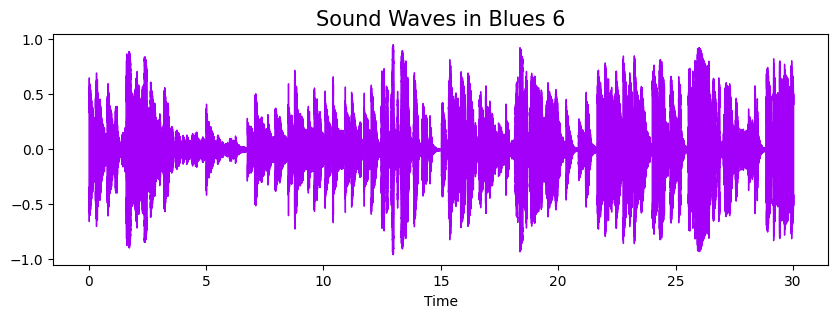

In [3]:
# 2D Representation of Music
plt.figure(figsize = (10, 3))
librosa.display.waveshow(y = y, sr = sr, color = "#A300F9");
plt.title("Sound Waves in Blues 6", fontsize = 15);

Shape of D object: (1025, 1293)


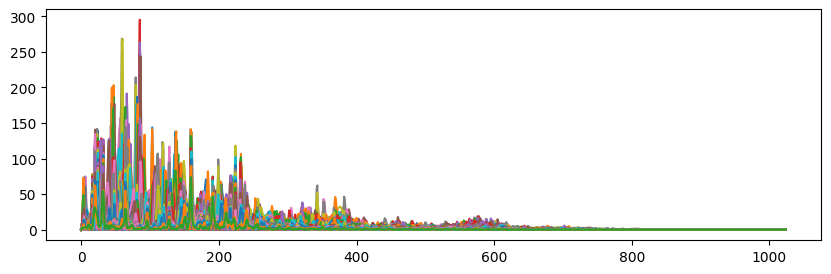

In [4]:
# Fast Fourier Transform(FFT)
# Function that gets a signal in the time domain as input, and outputs its decomposition into frequencies
# Transform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is approx. the log scale of amplitudes

# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(y = y, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))

plt.figure(figsize = (10, 3))
plt.plot(D);

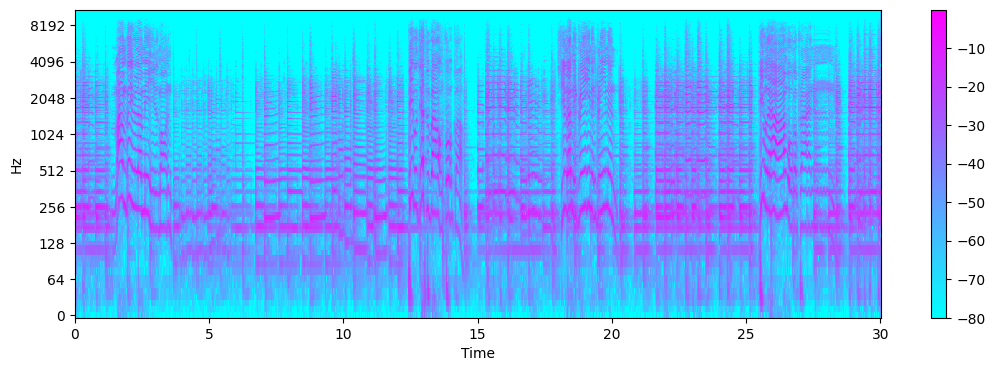

In [5]:
# The Spectrogram
# What is a spectrogram? A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time.
# When applied to an audio signal, spectrograms are sometimes called sonographs, voiceprints, or voicegrams (wiki).
# Here we convert the frequency axis to a logarithmic one.

# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (13, 4))
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool')
plt.colorbar();

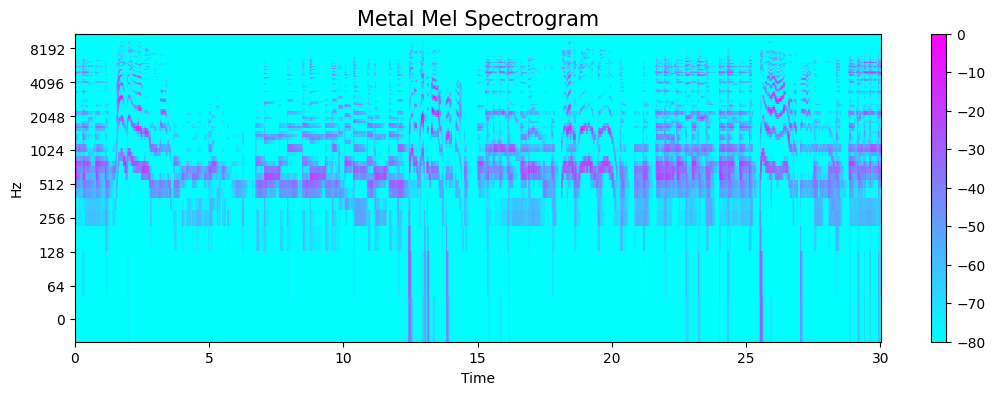

In [6]:
# Mel Spectrogram
# The Mel Scale, mathematically speaking, is the result of some non-linear transformation of the frequency scale.
# The Mel Spectrogram is a normal Spectrogram, but with a Mel Scale on the y axis.

y, sr = librosa.load('/content/drive/MyDrive/GTZAN /genres_original/blues/blues.00006.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (13, 4))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Metal Mel Spectrogram", fontsize = 15);

In [7]:
# Explore Audio Feature
# Zero Crossing Rate: the rate at which the signal changes from positive to negative or back.
zero_crossings = librosa.zero_crossings(y, pad=False)
print(sum(zero_crossings))

48429


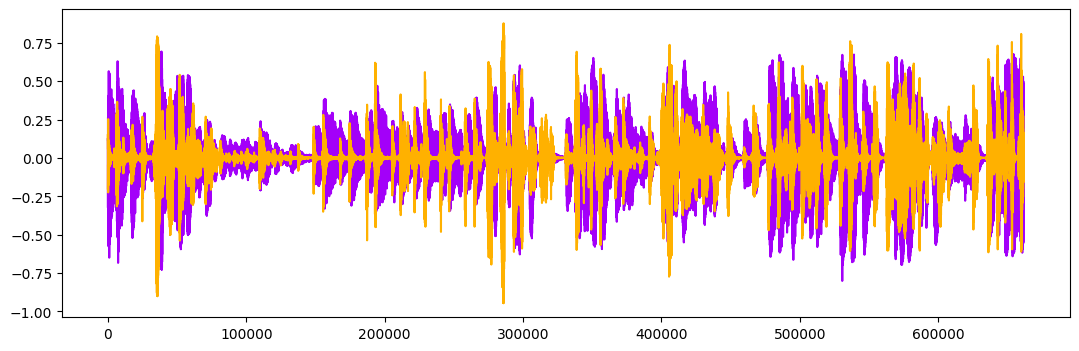

In [8]:
# Harmonics and Perceptrual
# Harmonics are characteristichs that human years can't distinguish (represents the sound color)
# Perceptrual understanding shock wave represents the sound rhythm and emotion
y_harm, y_perc = librosa.effects.hpss(y)

plt.figure(figsize = (13, 4))
plt.plot(y_harm, color = '#A300F9');
plt.plot(y_perc, color = '#FFB100');

In [9]:
# Tempo BMP (beats per minute): Dynamic programming beat tracker.
tempo, _ = librosa.beat.beat_track(y = y, sr = sr)
tempo

71.77734375

In [10]:
# Spectral Centroid: Indicates where the ”centre of mass” for a sound is located
# and is calculated as the weighted mean of the frequencies present in the sound.
# Calculate the Spectral Centroids
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]

# Shape is a vector
print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:', t)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

Centroids: [1397.04336272 1244.33203006 1116.20929002 ... 1888.75782215 1932.02777076
 2035.90392061] 

Shape of Spectral Centroids: (1293,) 

frames: range(0, 1293) 

t: [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.99537415e+01
 2.99769615e+01 3.00001814e+01]


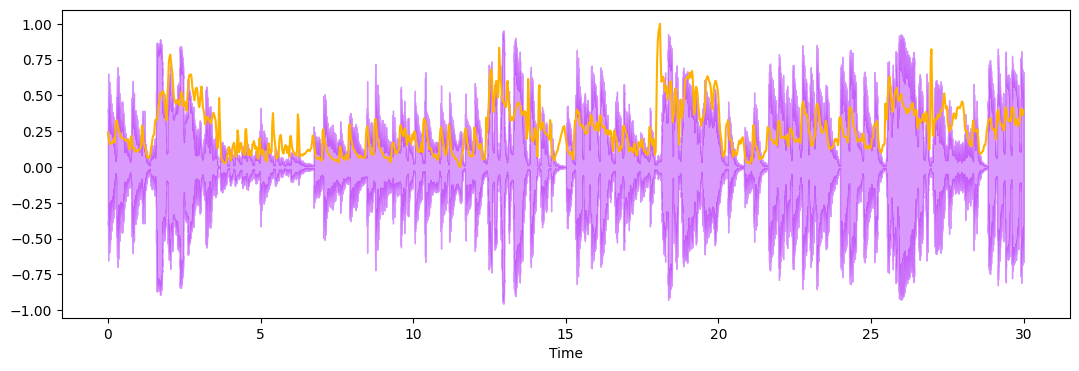

In [11]:
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (13, 4))
librosa.display.waveshow(y=y, sr=sr, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_centroids), color='#FFB100');

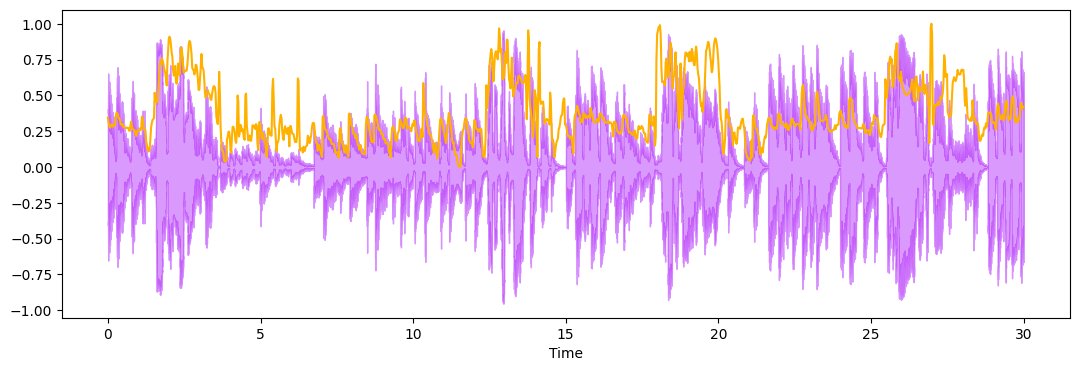

In [12]:
# Spectral Rolloff: is a measure of the shape of the signal.
# It represents the frequency below which a specified percentage of the total spectral energy
spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]

# The plot
plt.figure(figsize = (13, 4))
librosa.display.waveshow(y=y, sr=sr, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_rolloff), color='#FFB100');

In [13]:
# EDA: Feature file contains the mean and variance for each audio file fo the features analysed above.
data = pd.read_csv('/content/drive/MyDrive/GTZAN /features_30_sec.csv')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean             

In [14]:
# Check if the data is balance
data['label'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64

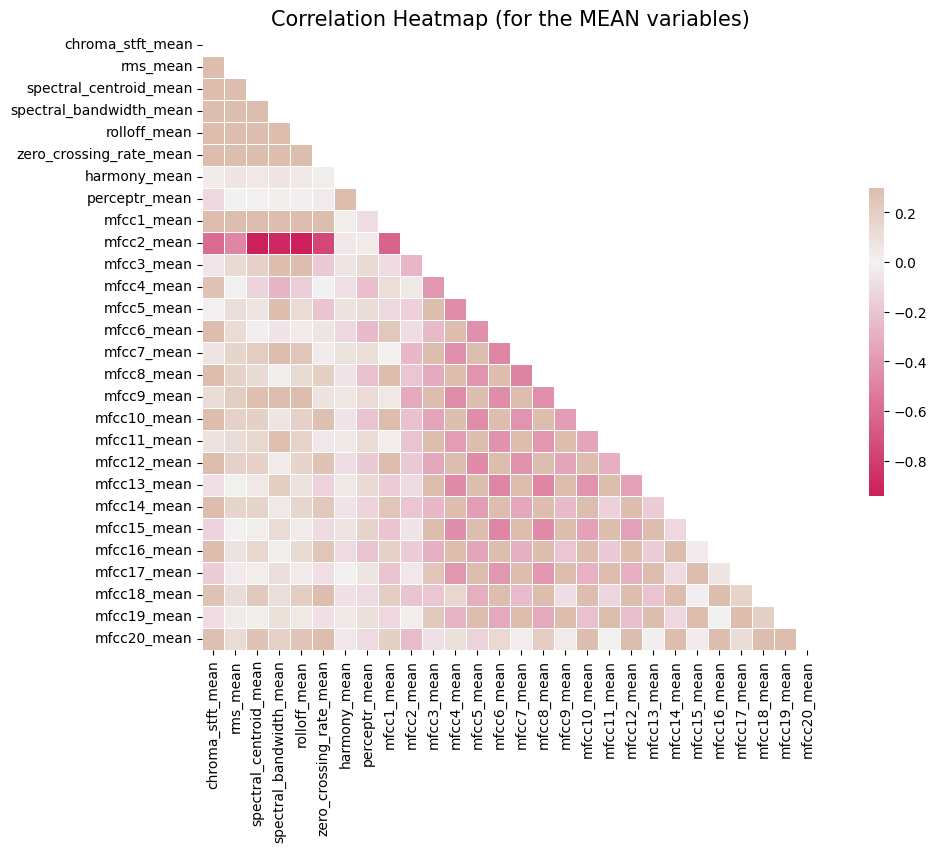

In [15]:
# Draw correlation heatmap means
# Computing the Correlation Matrix
spike_cols = [col for col in data.columns if 'mean' in col]
corr = data[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 8));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr Heatmap.jpg")

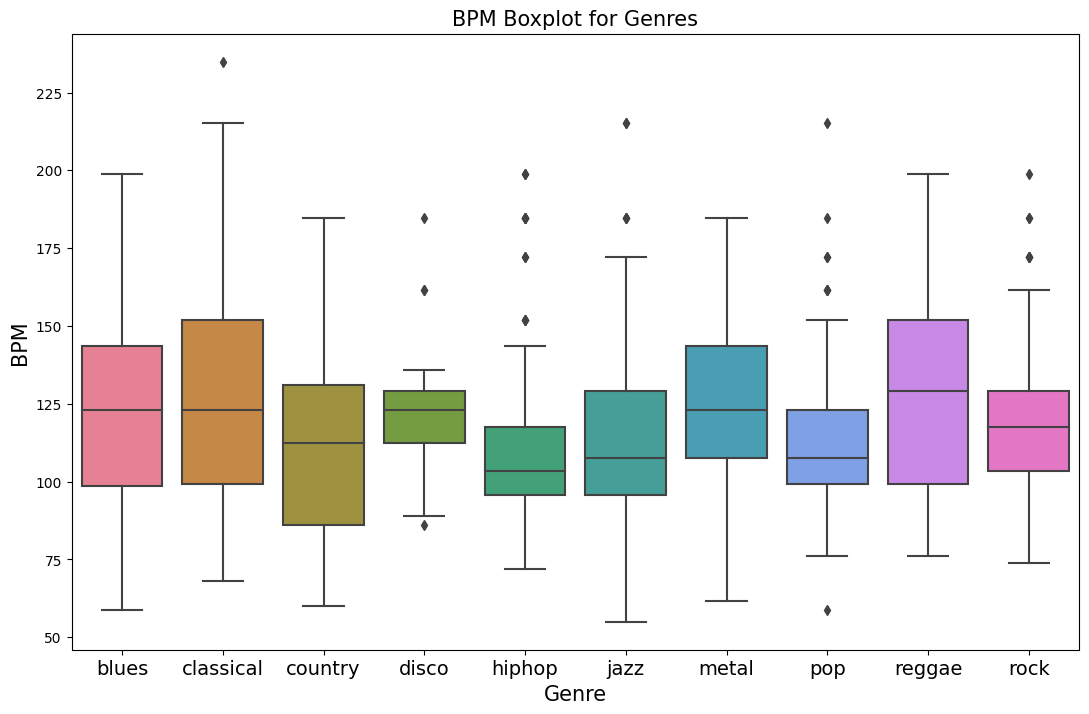

In [16]:
# Box Plot for Genres Distributions
x = data[["label", "tempo"]]

f, ax = plt.subplots(figsize=(13, 8));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM Boxplot.jpg")

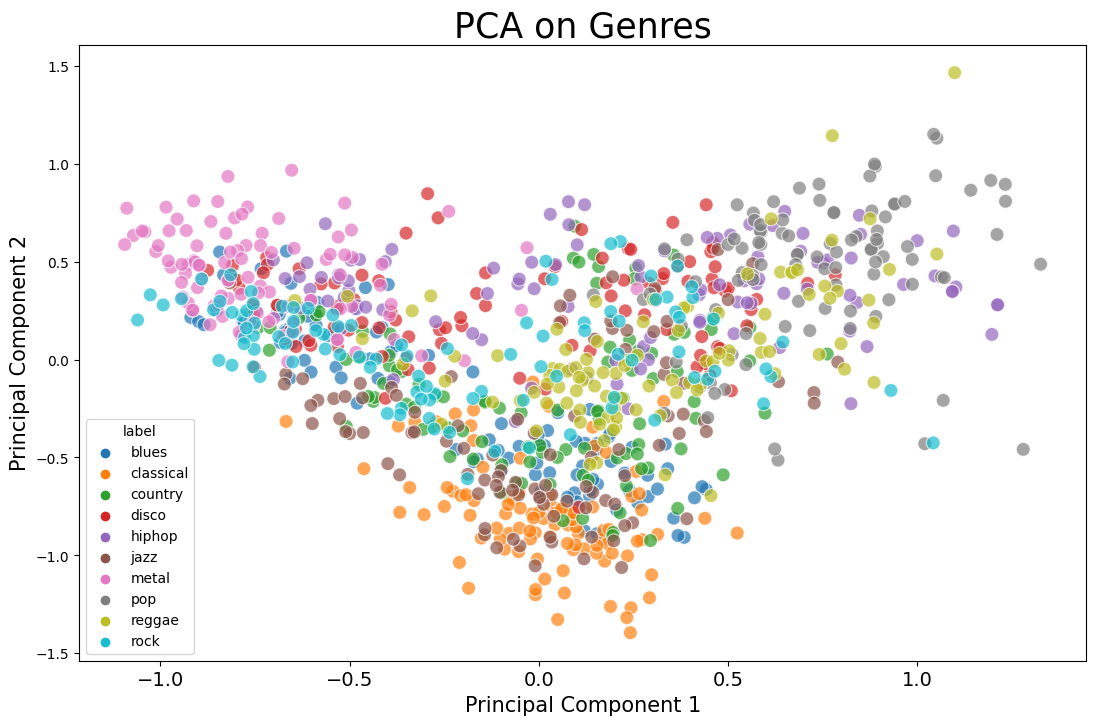

In [17]:
# Principal Component Analysis - to visualize possible groups of genres¶
# Normalization
# PCA
# The Scatter Plot

from sklearn import preprocessing

data = data.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

#### The Scatter Plot
plt.figure(figsize = (13, 8))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7,
               s = 100);

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")

In [40]:
# Build Model
# Import Libaries
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, f1_score, precision_score, recall_score, classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder

import time

# Load data
data = pd.read_csv('/content/drive/MyDrive/GTZAN /features_3_sec.csv')

data = data.iloc[0:, 1:]
data.head()

# Create dataset
y = data['label'] # genre variable.
X = data.loc[:, data.columns != 'label'] #select all columns but not the labels
# Normalize the data
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data.
X = pd.DataFrame(np_scaled, columns = cols)
X.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.0,0.355399,0.716757,0.293133,0.107955,0.262173,0.034784,0.459205,0.094130,0.346153,...,0.363613,0.056198,0.397172,0.066062,0.371828,0.055344,0.380831,0.026797,0.506746,0.047781
1,0.0,0.367322,0.670347,0.253040,0.044447,0.270969,0.018716,0.470831,0.052261,0.363722,...,0.468596,0.092912,0.351681,0.074001,0.362068,0.076365,0.418452,0.082414,0.593029,0.065548
2,0.0,0.373159,0.728067,0.296753,0.141663,0.265293,0.023073,0.494051,0.059922,0.378215,...,0.479681,0.096704,0.420979,0.050639,0.400536,0.067509,0.433742,0.043841,0.546264,0.036062
3,0.0,0.399349,0.677066,0.298024,0.075042,0.238427,0.023187,0.455246,0.066234,0.329587,...,0.386258,0.067995,0.387474,0.050617,0.380430,0.050030,0.405824,0.041898,0.562204,0.034873
4,0.0,0.355668,0.689113,0.322308,0.052149,0.233460,0.016451,0.451651,0.047830,0.318453,...,0.438567,0.042500,0.460314,0.083860,0.388590,0.076524,0.409019,0.020763,0.517913,0.031713


In [19]:
# Splitting the data into training and testing(70% - 30% split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
# Accuracy Function
def model_assess(model, title = "Default"):
    start_time = time.time()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

# Confusion Matrix
    cm = confusion_matrix(y_test, preds)
    class_names = np.unique(np.concatenate((y_test,preds)))

# Create a heatmap
    plt.figure(figsize=(8,6))
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)

# Add labels and title
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix - ' + title )
    plt.show()

# Evaluate the model
    accuracy = accuracy_score(y_test, preds)
    print('Accuracy', title, ':', round(accuracy, 5), '\n')
    precision = precision_score(y_test, preds, average='weighted')
    print('Precision', title, ':', round(precision, 5), '\n')
    recall = recall_score(y_test, preds, average='weighted')
    print('Recall', title, ':', round(recall, 5), '\n')
    f1 = f1_score(y_test, preds, average='weighted')
    print('F1 Score', title, ':', round(f1, 5), '\n')

# Calculate and display running time
    end_time = time.time()
    running_time = end_time - start_time
    print("Running Time for", title,":", round(running_time, 3), "seconds")

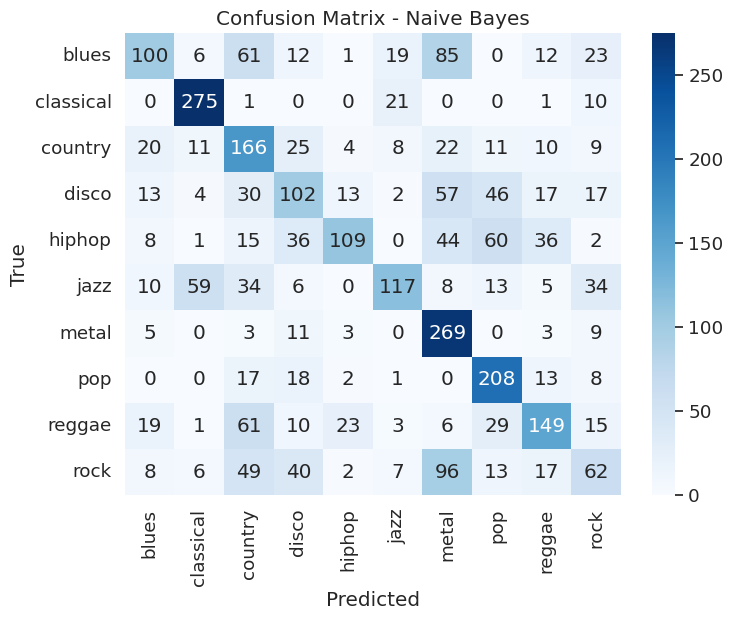

Accuracy Naive Bayes : 0.51952 

Precision Naive Bayes : 0.53411 

Recall Naive Bayes : 0.51952 

F1 Score Naive Bayes : 0.5015 

Running Time for Naive Bayes : 1.628 seconds


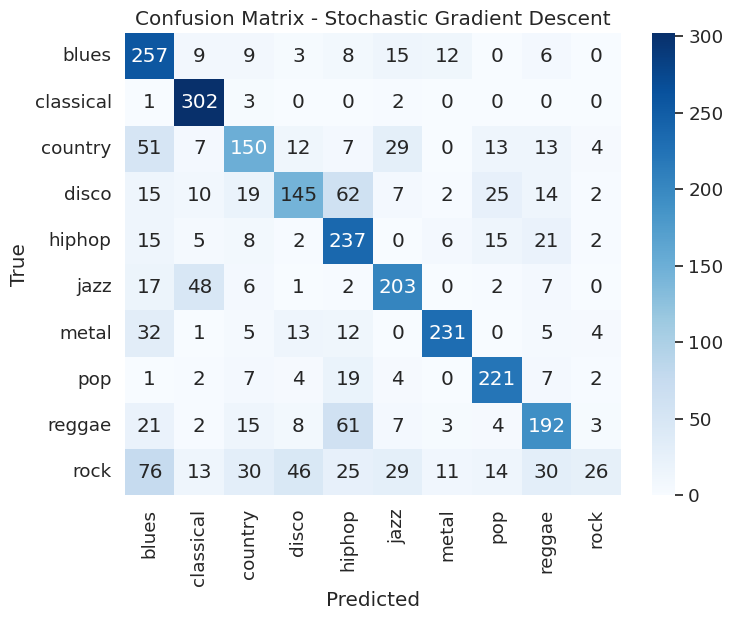

Accuracy Stochastic Gradient Descent : 0.65532 

Precision Stochastic Gradient Descent : 0.6596 

Recall Stochastic Gradient Descent : 0.65532 

F1 Score Stochastic Gradient Descent : 0.62996 

Running Time for Stochastic Gradient Descent : 2.51 seconds


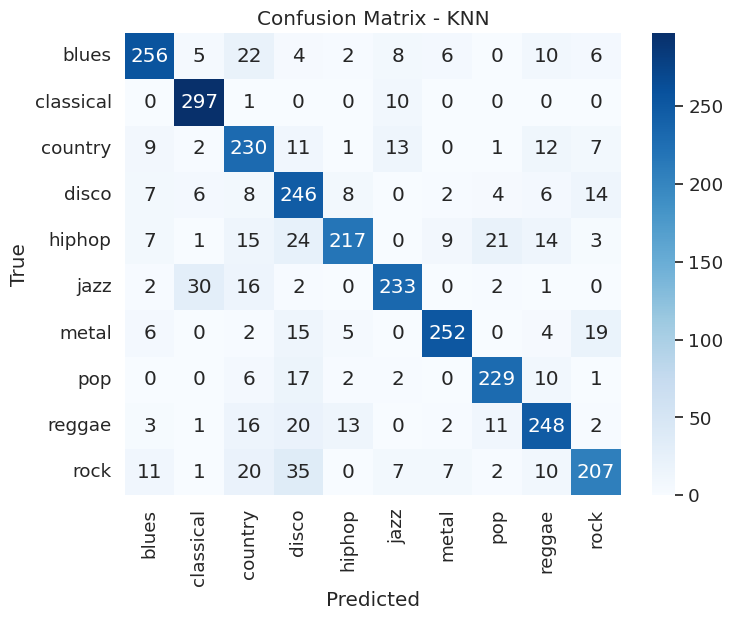

Accuracy KNN : 0.80581 

Precision KNN : 0.81336 

Recall KNN : 0.80581 

F1 Score KNN : 0.80627 

Running Time for KNN : 2.302 seconds


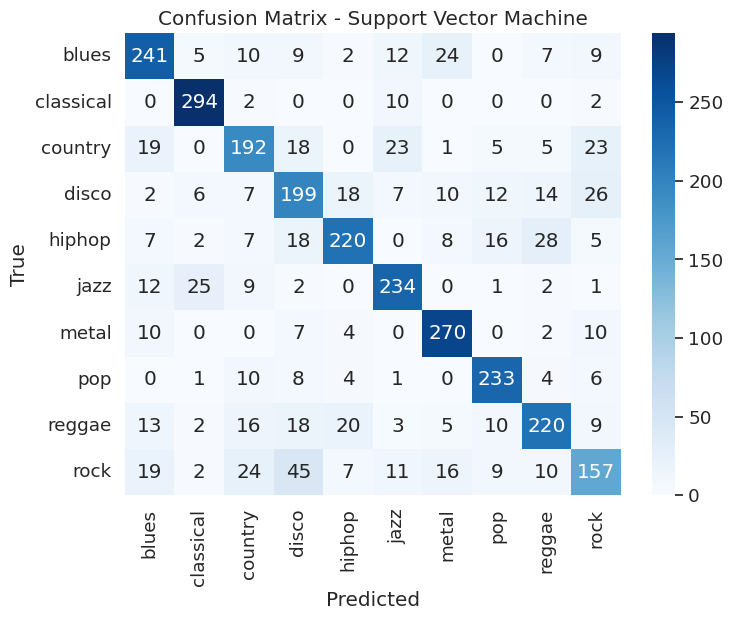

Accuracy Support Vector Machine : 0.75409 

Precision Support Vector Machine : 0.75123 

Recall Support Vector Machine : 0.75409 

F1 Score Support Vector Machine : 0.75108 

Running Time for Support Vector Machine : 9.76 seconds


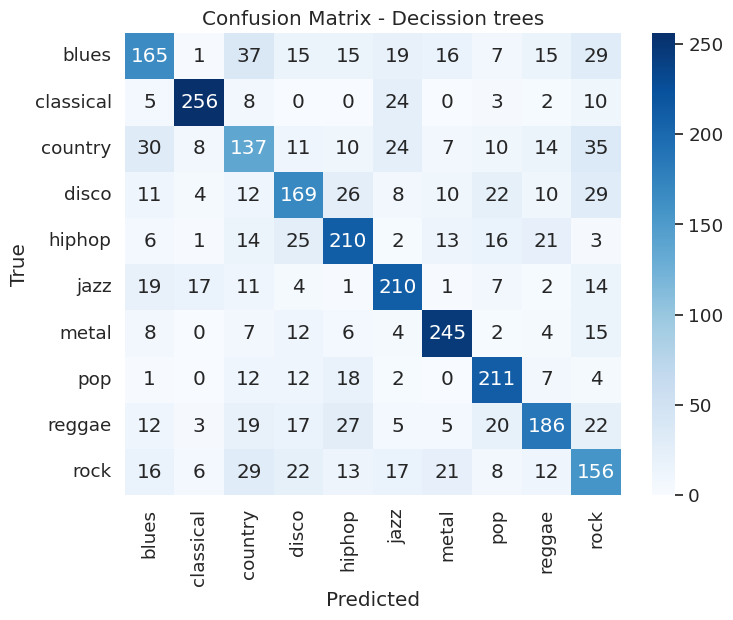

Accuracy Decission trees : 0.64898 

Precision Decission trees : 0.64895 

Recall Decission trees : 0.64898 

F1 Score Decission trees : 0.6476 

Running Time for Decission trees : 2.009 seconds


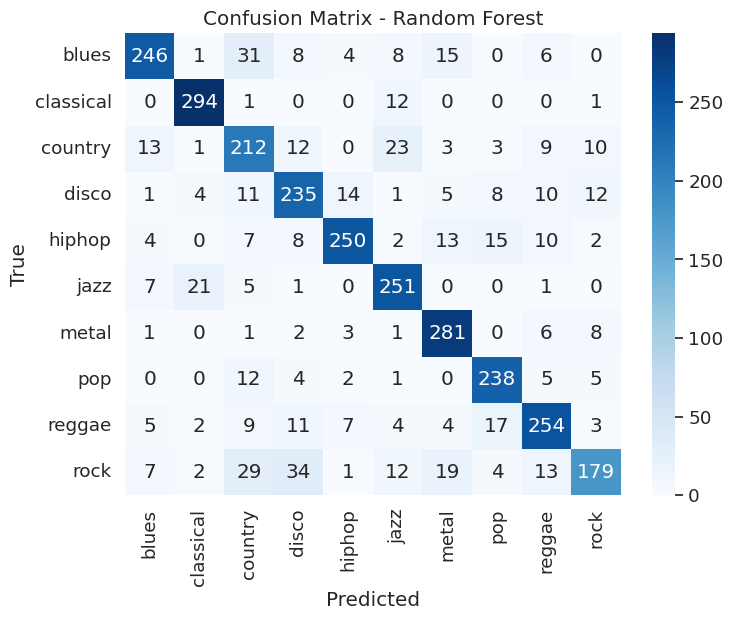

Accuracy Random Forest : 0.81415 

Precision Random Forest : 0.81676 

Recall Random Forest : 0.81415 

F1 Score Random Forest : 0.81241 

Running Time for Random Forest : 52.224 seconds


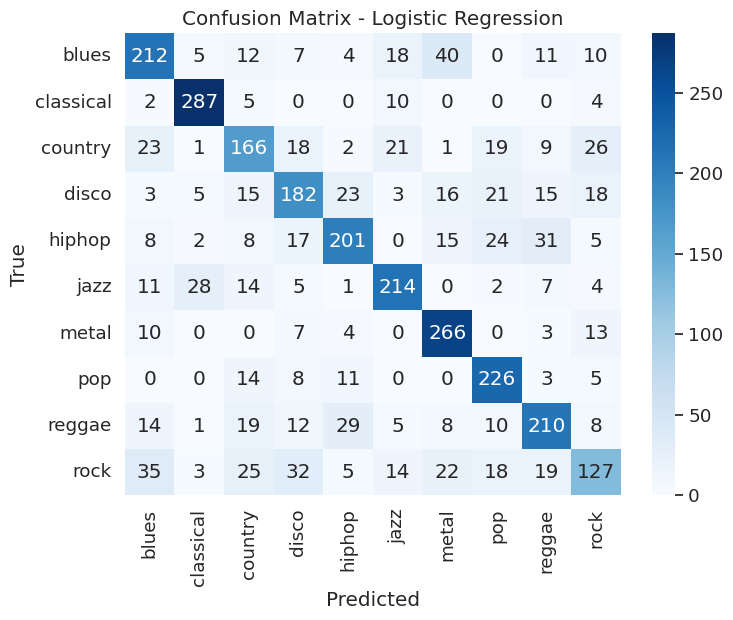

Accuracy Logistic Regression : 0.6977 

Precision Logistic Regression : 0.69207 

Recall Logistic Regression : 0.6977 

F1 Score Logistic Regression : 0.692 

Running Time for Logistic Regression : 2.978 seconds


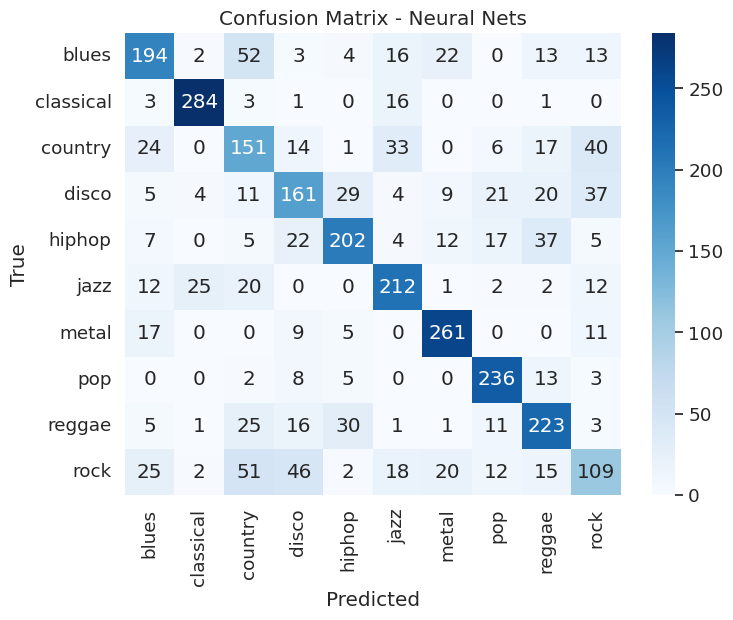

Accuracy Neural Nets : 0.67835 

Precision Neural Nets : 0.67289 

Recall Neural Nets : 0.67835 

F1 Score Neural Nets : 0.67375 

Running Time for Neural Nets : 371.151 seconds


In [37]:
# Test Different Models

# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")

In [26]:
# Optimize KNN Model by using Grid Search Cross-Validation
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [5,10,15,20],
    'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute'],
    'p':[1,2]
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy for KNN:{accuracy}')

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Accuracy for KNN:0.9232565899232565


In [ ]:
# Optimize Random Forest Model by using Grid Search Cross-Validation
rforest = RandomForestClassifier(random_state=0)

param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(rforest, param_grid,cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy for Random Forest:{accuracy}')

In [41]:
# Optimize Neural Network Model using Tensorflow
# Encode the labels into numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define the neural network model
model = Sequential()

# Add input layer
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.5))

# Add hidden layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Add output layer
num_classes = len(label_encoder.classes_)
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, epochs=20, batch_size=32, validation_data=(X_test, y_test_encoded))

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred_classes))

print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred_classes, target_names=label_encoder.classes_))

Epoch 1/20
219/219 [==============================] - 2s 4ms/step - loss: 2.1235 - accuracy: 0.2335 - val_loss: 1.7941 - val_accuracy: 0.3780
Epoch 2/20
219/219 [==============================] - 1s 3ms/step - loss: 1.7688 - accuracy: 0.3496 - val_loss: 1.5196 - val_accuracy: 0.4551
Epoch 3/20
219/219 [==============================] - 1s 3ms/step - loss: 1.6081 - accuracy: 0.4025 - val_loss: 1.3824 - val_accuracy: 0.4908
Epoch 4/20
219/219 [==============================] - 1s 3ms/step - loss: 1.5398 - accuracy: 0.4260 - val_loss: 1.3338 - val_accuracy: 0.5205
Epoch 5/20
219/219 [==============================] - 1s 3ms/step - loss: 1.4743 - accuracy: 0.4589 - val_loss: 1.2708 - val_accuracy: 0.5522
Epoch 6/20
219/219 [==============================] - 1s 3ms/step - loss: 1.4312 - accuracy: 0.4709 - val_loss: 1.2282 - val_accuracy: 0.5546
Epoch 7/20
219/219 [==============================] - 1s 3ms/step - loss: 1.3858 - accuracy: 0.4916 - val_loss: 1.1717 - val_accuracy: 0.5846
Epoch 